# Chapitre 5 - La data visualisation avec Python (2ème partie)
## 5.3 Quelques bases de cartographie

La cartographie est un domaine à part entière qui a son propre environnement de travail notamment avec un grand nombre de logiciels de SIG (système d’information géographique).

Python vous permettra de travailler avec certains d’entre eux. Par exemple, de
nombreux traitements avec le logiciel QGIS sont automatisables en Python.

### 5.3.1 Installation et utilisation de Cartopy

Cartopy n’est pas installé par défaut dans votre environnement Anaconda. Il va
falloir l’installer en utilisant votre gestionnaire d’environnement.

Une fois que nous avons installé Cartopy, nous allons pouvoir représenter des
cartes.

Le code suivant permet de représenter deux points sur le globe et de les lier en
utilisant deux distances :

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Text(154.2, -45.9, 'Sydney')

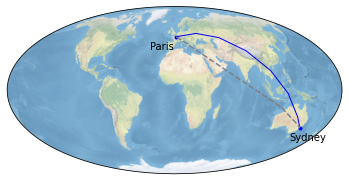

In [2]:
# on définit le fond de carte
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
# on définit les points à afficher
paris_lon, paris_lat = 2.3, 48.8
sydney_lon, sydney_lat = 151.2, -33.9
# on affiche le lien entre les deux villes en utilisant la métrique Geodetic
plt.plot([paris_lon, sydney_lon], [paris_lat, sydney_lat],
color='blue', linewidth=1, marker='.', transform=ccrs.Geodetic(),)
# on affiche le lien entre les deux villes en utilisant
# la métrique PlateCarree
plt.plot([paris_lon, sydney_lon], [paris_lat, sydney_lat],
color='grey', linestyle='--',
transform=ccrs.PlateCarree(),
)
# on ajoute du texte
plt.text(paris_lon-3, paris_lat - 12, 'Paris',
horizontalalignment='right',
transform=ccrs.Geodetic())
plt.text(sydney_lon + 3, sydney_lat - 12, 'Sydney',
horizontalalignment='left',
transform=ccrs.Geodetic())

Si on désire maintenant utiliser les données AirBnB de Paris, on peut combiner les deux packages que sont Matplotlib et Cartopy avec les données OpenStreetMap :

In [3]:
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# on importe les données
listing=pd.read_csv("../data/listing_extrait.csv")

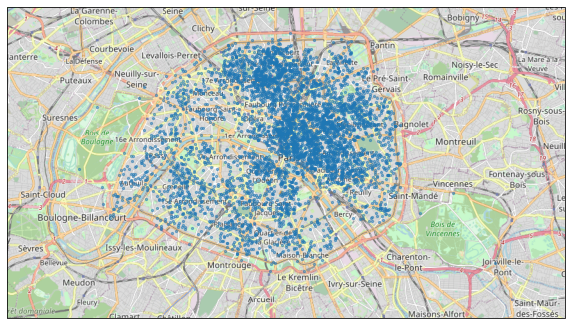

In [5]:
# on utilise Open Street Map (OSM)
osm_tiles = OSM()
# on crée une figure
plt.figure(figsize=(10,10))
# on crée notre fond de carte en adaptant aux coordonnées de Paris
ax = plt.axes(projection=osm_tiles.crs)
ax.set_extent([2.2, 2.5, 48.8, 48.91],
ccrs.PlateCarree())
ax.add_image(osm_tiles, 12)
# on ajoute un nuage de points avec les données AirBnB
ax.scatter("longitude","latitude", data=listing, s=5, 
           transform=ccrs.PlateCarree(), alpha=.5)

On peut aussi simplement le faire avec des données GoogleMap :

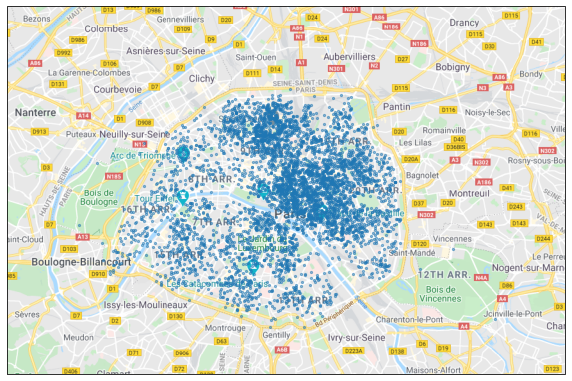

In [6]:
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles
# on crée la figure
fig = plt.figure(figsize=(10,10))
# on récupère les données Google Map
google_tiles = GoogleTiles()
# on crée le graphique
ax = plt.axes(projection=google_tiles.crs)
# on adapte les axes à la ville de Paris
ax.set_extent((2.2, 2.5, 48.8, 48.93))
# on ajoute l’image sur le graphique
zoom = 12
ax.add_image(google_tiles, zoom )
# on ajoute les données
ax.scatter("longitude","latitude", data=listing, s=5, transform=ccrs.PlateCarree(), alpha=.5)

### 5.3.2 Les autres outils
#### Folium
On commence par installer Folium dans notre environnement. 

On va utiliser le prix des logements, on va donc transformer cette colonne :

In [7]:
listing["price"]=pd.to_numeric(listing["price"].str.replace("$","")\
                               .str.replace(",",""))

On cherche à afficher les logements coûtant plus de 500 dollars la nuit.

On peut ensuite ajouter le code :

In [8]:
import folium
# création du plan et centrage sur Paris
map2 = folium.Map(location=[48.84,2.35], zoom_start=12)
# création d’un DataFrame avec les logements à plus de 1000 euros la nuit
listing_chers = listing[listing["price"]>500]\
                 [["latitude","longitude", "price","name"]]

# application d’une fonction sur les lignes du DataFrame 
# qui permet d’ajouter des marques sur le plan
listing_chers.apply(lambda ligne:folium.Marker(location=[ligne["latitude"],
                                                         ligne["longitude"]])\
                    .add_to(map2), axis=1)
# sauvegarde du plan en html
map2.save("map.html")
# affichage dans le notebook
map2

On peut bien sûr aller plus loin avec les différents outils de Python que nous avons déjà vu mais aussi avec d'autres outils comme notamment iPyLeaflet.